Importing Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.image import imread
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation,Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Connecting with Kaggle to extract data

In [5]:
! pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d ichhadhari/indian-birds

Dataset URL: https://www.kaggle.com/datasets/ichhadhari/indian-birds
License(s): CC0-1.0
100% 5.29G/5.30G [03:19<00:00, 22.7MB/s]
100% 5.30G/5.30G [03:20<00:00, 28.4MB/s]


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/indian-birds.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

Birds_25  indian-birds.zip  kaggle.json  sample_data


Plotting images of certain Bird species

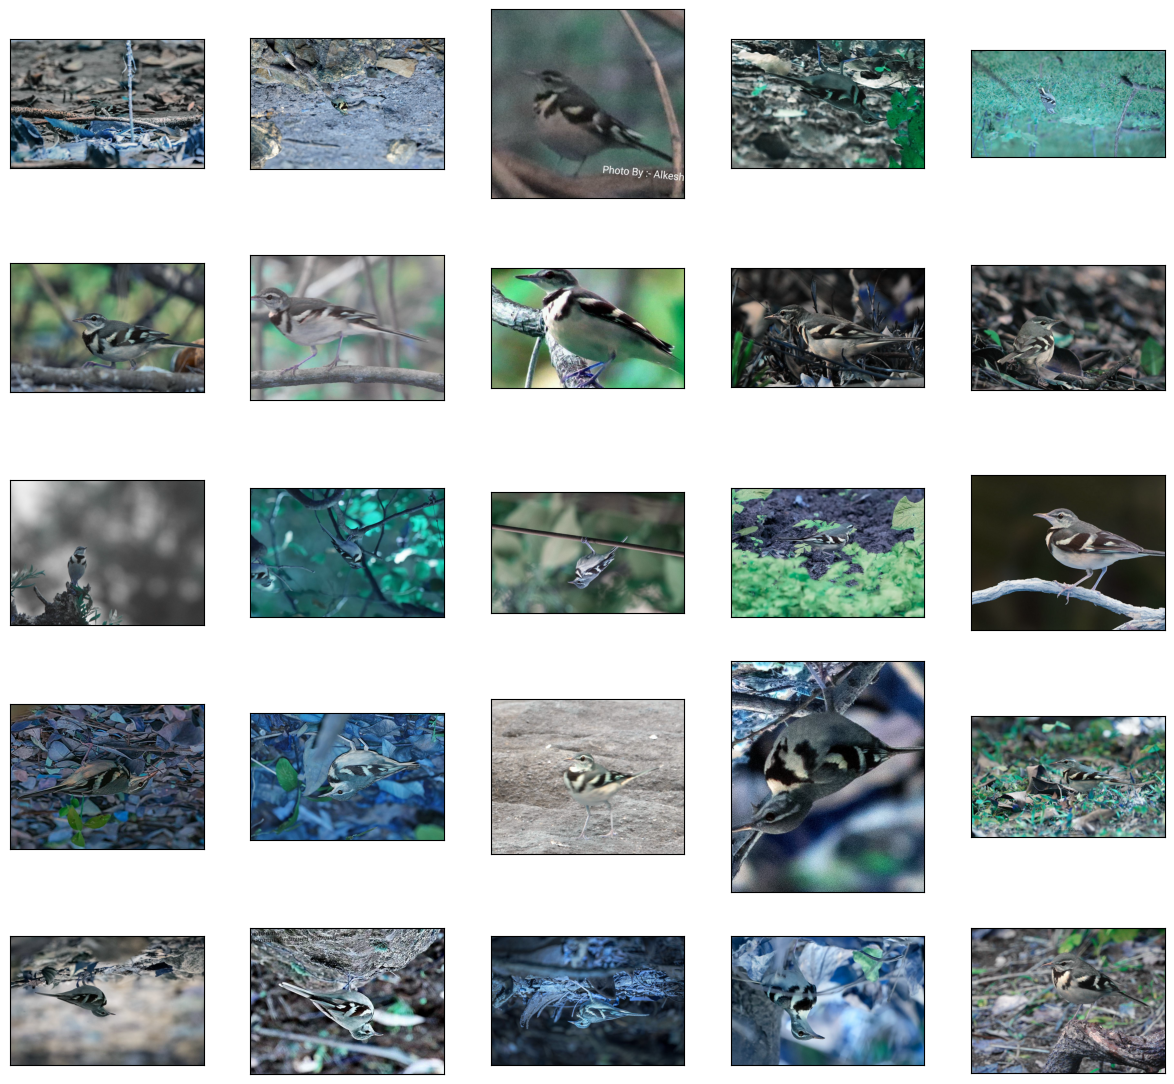

In [16]:
plt.figure(figsize=(12,12))

for i in range(1,26):
    # defining the path
    path='/content/Birds_25/train/Forest-Wagtail'
    # using subplots
    plt.subplot(5,5,i)
    plt.tight_layout()
    # using random images
    ramd_img=cv2.imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

<ipython-input-9-403fd3daa673>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i)


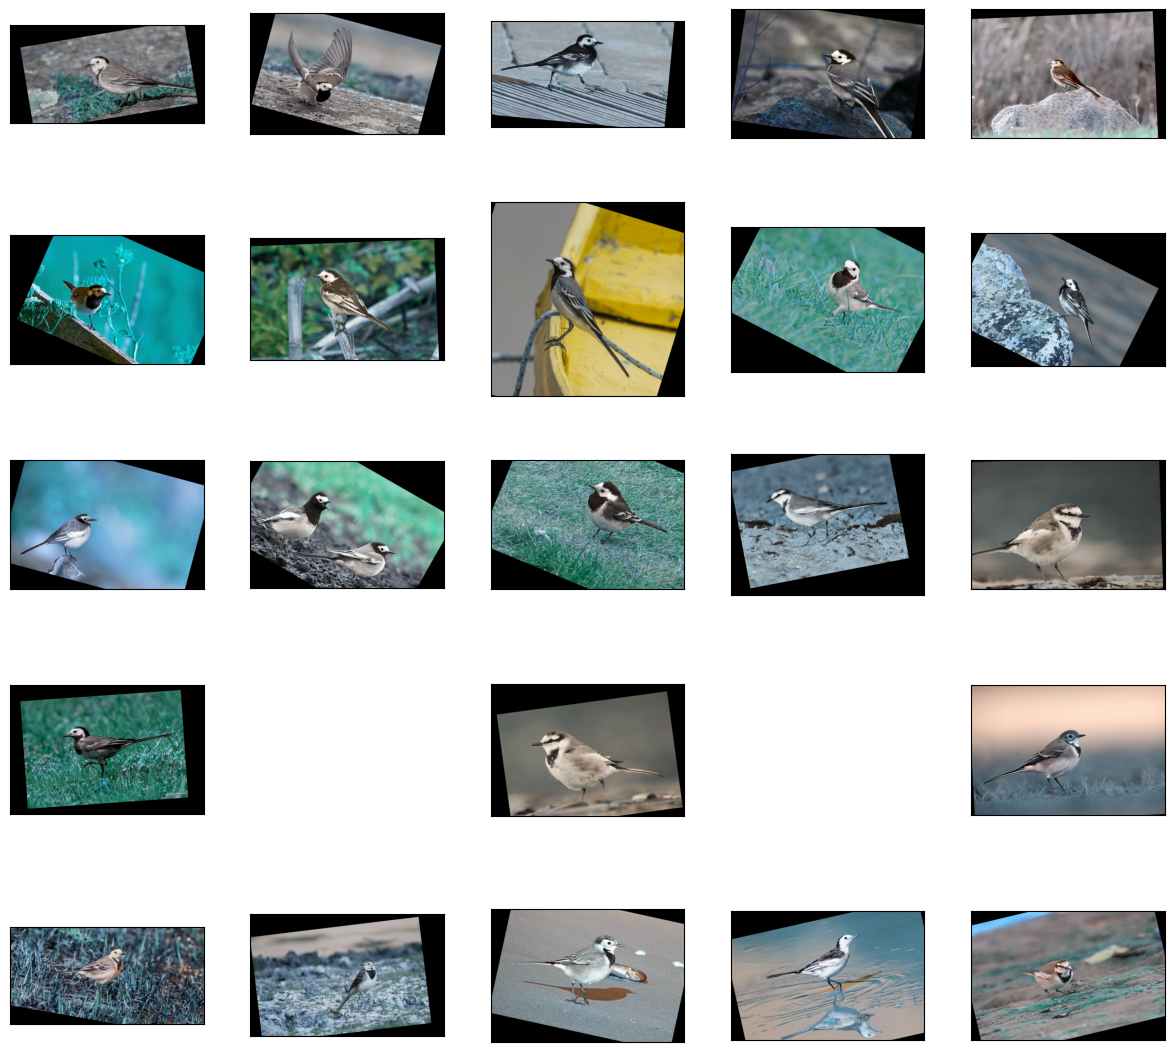

In [ ]:
plt.figure(figsize=(12,12))

for i in range(1,26):
    # defining the path
    path='/content/Birds_25/train/White-Wagtail'
    # using subplots
    plt.subplot(5,5,i)
    plt.tight_layout()
    # using random images
    ramd_img=cv2.imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

<ipython-input-10-bb5df6e9cdab>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i)


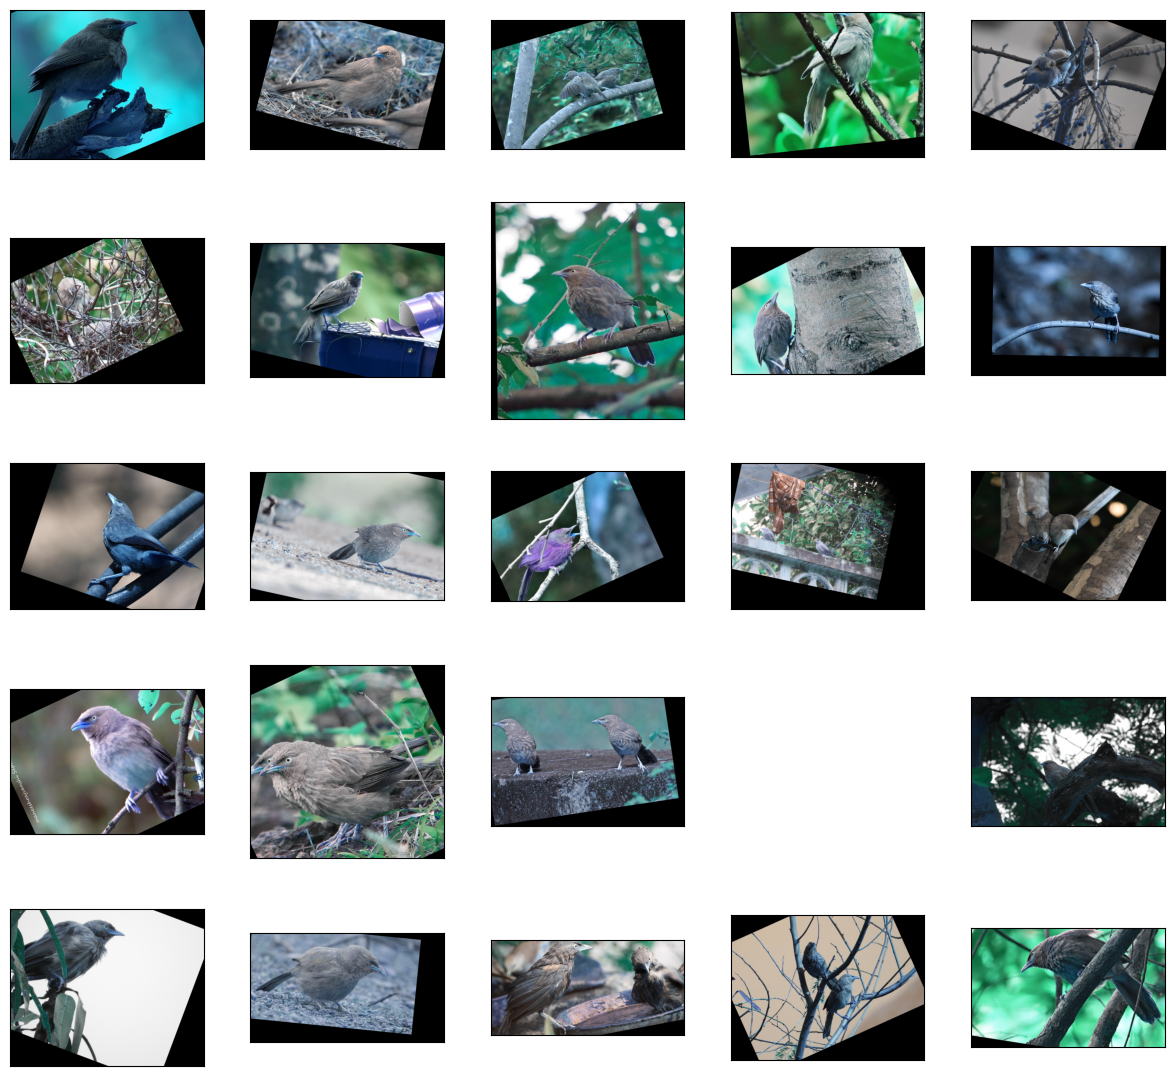

In [ ]:
plt.figure(figsize=(12,12))

for i in range(1,26):
    # defining the path
    path='/content/Birds_25/train/Jungle-Babbler'
    # using subplots
    plt.subplot(5,5,i)
    plt.tight_layout()
    # using random images
    ramd_img=cv2.imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

Reading the data

In [9]:
dataset_path = {
             "train_path" : "/content/Birds_25/train",
             "valid_path" : "/content/Birds_25/valid",
          }
all_data = []

for path in dataset_path.values():
    data = {"img_path": [] , "label": [] }
    labels = os.listdir(path)

    for label in labels:
        folder_path = os.path.join(path, label)
        file_names = os.listdir(folder_path)
        for file_name in file_names:
            img_path = os.path.join(folder_path, file_name)
            data["img_path"].append(img_path)
            data["label"].append(label)
    all_data.append(data.copy())
    data.clear()

In [10]:
train_df = pd.DataFrame.from_dict(all_data[0])
valid_df = pd.DataFrame.from_dict(all_data[1])

In [9]:
train_df

img_path                label
0      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
1      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
2      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
3      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
4      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
...                                                  ...                  ...
29995     /content/Birds_25/train/Hoopoe/Hoopoe_1384.jpg               Hoopoe
29996      /content/Birds_25/train/Hoopoe/Hoopoe_239.jpg               Hoopoe
29997      /content/Birds_25/train/Hoopoe/Hoopoe_795.jpg               Hoopoe
29998      /content/Birds_25/train/Hoopoe/Hoopoe_185.jpg               Hoopoe
29999      /content/Birds_25/train/Hoopoe/Hoopoe_688.jpg               Hoopoe

[30000 rows x 2 columns]

In [ ]:
valid_df

img_path             label
0     /content/Birds_25/valid/Common-Rosefinch/Commo...  Common-Rosefinch
1     /content/Birds_25/valid/Common-Rosefinch/Commo...  Common-Rosefinch
2     /content/Birds_25/valid/Common-Rosefinch/Commo...  Common-Rosefinch
3     /content/Birds_25/valid/Common-Rosefinch/Commo...  Common-Rosefinch
4     /content/Birds_25/valid/Common-Rosefinch/Commo...  Common-Rosefinch
...                                                 ...               ...
7495  /content/Birds_25/valid/Ruddy-Shelduck/Ruddy-S...    Ruddy-Shelduck
7496  /content/Birds_25/valid/Ruddy-Shelduck/Ruddy-S...    Ruddy-Shelduck
7497  /content/Birds_25/valid/Ruddy-Shelduck/Ruddy-S...    Ruddy-Shelduck
7498  /content/Birds_25/valid/Ruddy-Shelduck/Ruddy-S...    Ruddy-Shelduck
7499  /content/Birds_25/valid/Ruddy-Shelduck/ML37385...    Ruddy-Shelduck

[7500 rows x 2 columns]

In [10]:
train_df['label'].value_counts(normalize=False)

label
Brown-Headed-Barbet          1200
Northern-Lapwing             1200
Ruddy-Shelduck               1200
White-Breasted-Waterhen      1200
Forest-Wagtail               1200
Cattle-Egret                 1200
Red-Wattled-Lapwing          1200
Indian-Roller                1200
Common-Myna                  1200
Common-Rosefinch             1200
Indian-Peacock               1200
Common-Kingfisher            1200
Jungle-Babbler               1200
White-Wagtail                1200
House-Crow                   1200
Sarus-Crane                  1200
Rufous-Treepie               1200
White-Breasted-Kingfisher    1200
Asian-Green-Bee-Eater        1200
Indian-Pitta                 1200
Gray-Wagtail                 1200
Common-Tailorbird            1200
Coppersmith-Barbet           1200
Indian-Grey-Hornbill         1200
Hoopoe                       1200
Name: count, dtype: int64

In [11]:
valid_df['label'].value_counts(normalize=False)

label
Brown-Headed-Barbet          300
Northern-Lapwing             300
Ruddy-Shelduck               300
White-Breasted-Waterhen      300
Forest-Wagtail               300
Cattle-Egret                 300
Red-Wattled-Lapwing          300
Indian-Roller                300
Common-Myna                  300
Common-Rosefinch             300
Indian-Peacock               300
Common-Kingfisher            300
Jungle-Babbler               300
White-Wagtail                300
House-Crow                   300
Sarus-Crane                  300
Rufous-Treepie               300
White-Breasted-Kingfisher    300
Asian-Green-Bee-Eater        300
Indian-Pitta                 300
Gray-Wagtail                 300
Common-Tailorbird            300
Coppersmith-Barbet           300
Indian-Grey-Hornbill         300
Hoopoe                       300
Name: count, dtype: int64

In [11]:
df=pd.concat([train_df,valid_df],ignore_index=True)
df

img_path                label
0      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
1      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
2      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
3      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
4      /content/Birds_25/train/Brown-Headed-Barbet/Br...  Brown-Headed-Barbet
...                                                  ...                  ...
37495     /content/Birds_25/valid/Hoopoe/Hoopoe_1445.jpg               Hoopoe
37496      /content/Birds_25/valid/Hoopoe/Hoopoe_160.jpg               Hoopoe
37497      /content/Birds_25/valid/Hoopoe/Hoopoe_885.jpg               Hoopoe
37498      /content/Birds_25/valid/Hoopoe/Hoopoe_386.jpg               Hoopoe
37499     /content/Birds_25/valid/Hoopoe/Hoopoe_1380.jpg               Hoopoe

[37500 rows x 2 columns]

In [20]:
df["label"].value_counts()

label
Brown-Headed-Barbet          1500
Northern-Lapwing             1500
Ruddy-Shelduck               1500
White-Breasted-Waterhen      1500
Forest-Wagtail               1500
Cattle-Egret                 1500
Red-Wattled-Lapwing          1500
Indian-Roller                1500
Common-Myna                  1500
Common-Rosefinch             1500
Indian-Peacock               1500
Common-Kingfisher            1500
Jungle-Babbler               1500
White-Wagtail                1500
House-Crow                   1500
Sarus-Crane                  1500
Rufous-Treepie               1500
White-Breasted-Kingfisher    1500
Asian-Green-Bee-Eater        1500
Indian-Pitta                 1500
Gray-Wagtail                 1500
Common-Tailorbird            1500
Coppersmith-Barbet           1500
Indian-Grey-Hornbill         1500
Hoopoe                       1500
Name: count, dtype: int64

In [12]:
data = []

for img_file in list(df["img_path"]):

  image = Image.open(img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



In [ ]:
df["img_path"][0:10]

0    /content/Birds_25/train/Brown-Headed-Barbet/Br...
1    /content/Birds_25/train/Brown-Headed-Barbet/Br...
2    /content/Birds_25/train/Brown-Headed-Barbet/Br...
3    /content/Birds_25/train/Brown-Headed-Barbet/Br...
4    /content/Birds_25/train/Brown-Headed-Barbet/Br...
5    /content/Birds_25/train/Brown-Headed-Barbet/Br...
6    /content/Birds_25/train/Brown-Headed-Barbet/Br...
7    /content/Birds_25/train/Brown-Headed-Barbet/Br...
8    /content/Birds_25/train/Brown-Headed-Barbet/Br...
9    /content/Birds_25/train/Brown-Headed-Barbet/Br...
Name: img_path, dtype: object

In [12]:
data[0].shape

(128, 128, 3)

Train-Test Split

In [13]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y=np.array(df["label"])

In [23]:
Y.shape

(37500,)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
X_test.shape

(11250, 128, 128, 3)

In [ ]:
X_train=np.array(X_train, dtype=np.float16)/ 255.0
X_test=np.array(X_test, dtype=np.float16)/ 255.0

Label Binarization

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.fit_transform(Y_test)

print(lb.classes_)

['Asian-Green-Bee-Eater' 'Brown-Headed-Barbet' 'Cattle-Egret'
 'Common-Kingfisher' 'Common-Myna' 'Common-Rosefinch' 'Common-Tailorbird'
 'Coppersmith-Barbet' 'Forest-Wagtail' 'Gray-Wagtail' 'Hoopoe'
 'House-Crow' 'Indian-Grey-Hornbill' 'Indian-Peacock' 'Indian-Pitta'
 'Indian-Roller' 'Jungle-Babbler' 'Northern-Lapwing' 'Red-Wattled-Lapwing'
 'Ruddy-Shelduck' 'Rufous-Treepie' 'Sarus-Crane'
 'White-Breasted-Kingfisher' 'White-Breasted-Waterhen' 'White-Wagtail']


In [16]:
num_classes=len(lb.classes_)

Model Building

In [17]:
def load_model():
    model=Sequential([
        Conv2D(8, (3,3), padding='same', input_shape=(128,128, 3), activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Conv2D(16, (3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Conv2D(32, (3,3), padding='same',  activation='relu'),
        MaxPooling2D(pool_size=(3,3)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
    optimizer="adam",
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

In [18]:
early_stopping=callbacks.EarlyStopping(
    patience=10,
    min_delta=0,
    monitor='val_loss',
    restore_best_weights=True,
    verbose=0,
    mode='min',
    baseline=None,
)
# This callback is used to reduce the learning rate when a metric has stopped improving
plateau=callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    verbose=0,
    mode='min'
)

In [21]:
nn_model=load_model()

historyy=nn_model.fit(X_train,Y_train, validation_data=(X_test,Y_test),
                    epochs=50,
                    callbacks=[early_stopping, plateau]
                    )

Epoch 1/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 218s 263ms/step - acc: 0.1046 - loss: 4.6776 - val_acc: 0.2268 - val_loss: 2.4845 - learning_rate: 0.0010
Epoch 2/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 264s 266ms/step - acc: 0.2715 - loss: 2.3419 - val_acc: 0.3172 - val_loss: 2.1998 - learning_rate: 0.0010
Epoch 3/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 211s 258ms/step - acc: 0.3823 - loss: 1.9835 - val_acc: 0.3844 - val_loss: 1.9896 - learning_rate: 0.0010
Epoch 4/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 263s 259ms/step - acc: 0.4565 - loss: 1.7349 - val_acc: 0.4324 - val_loss: 1.8427 - learning_rate: 0.0010
Epoch 5/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 226s 275ms/step - acc: 0.5198 - loss: 1.5328 - val_acc: 0.4686 - val_loss: 1.7538 - learning_rate: 0.0010
Epoch 6/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 250s 260ms/step - acc: 0.5777 - loss: 1.3547 - val_acc: 0.4911 - val_loss: 1.7442 - learning_rate: 0.0010
Epoch 7/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 263s 261ms/step - acc: 0.6150 - loss: 1.2180 - val_acc: 0.5106 - val_loss: 1.6691 - 

Evaluation

In [22]:
loss,acc=nn_model.evaluate(X_test,Y_test)

352/352 ━━━━━━━━━━━━━━━━━━━━ 48s 136ms/step - acc: 0.5090 - loss: 1.6920


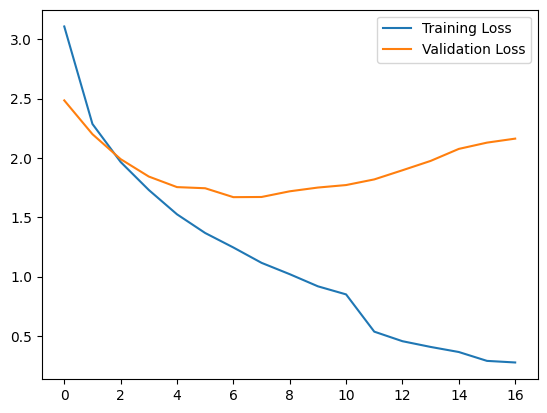

In [23]:
plt.plot(historyy.history['loss'], label='Training Loss')
plt.plot(historyy.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

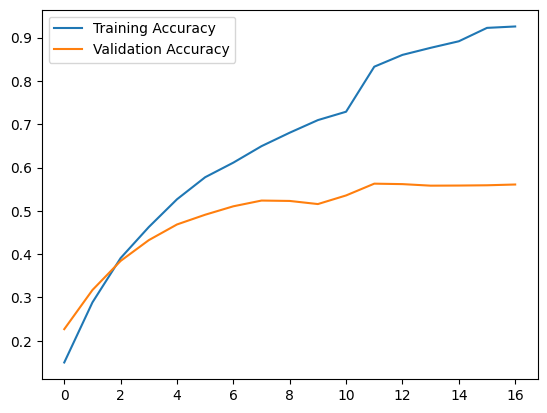

In [24]:
plt.plot(historyy.history['acc'], label='Training Accuracy')
plt.plot(historyy.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

Prediction

In [25]:
y_pred=nn_model.predict(X_test)

352/352 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step


In [26]:
y_predicted_labels=[np.argmax(i) for i in y_pred]
y_predicted_labels=np.array(y_predicted_labels)

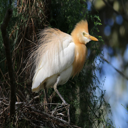

In [30]:
img=array_to_img(X_test[10])
img


In [29]:
print('Originally: ', labels[np.argmax(Y_test[10])])
print('Predicted: ', labels[np.argmax(y_pred[10])])

Originally:  Indian-Grey-Hornbill
Predicted:  Indian-Grey-Hornbill
